Simple demonstration of the Bayesian calibration using CmdStanPy https://mc-stan.org/cmdstanpy/

In [87]:
from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Reading the data

In [98]:
accel = pd.read_csv('../data/IMU2.txt')
accel.head(5)

,accel_x,accel_y,accel_z
0,0.018066,-0.296875,1.040894
1,0.016357,-0.297974,1.037354
2,0.015137,-0.297607,1.032715
3,0.018188,-0.297485,1.034912
4,0.015015,-0.297607,1.039062


Prepare the data for Stan

In [103]:
from cmdstanpy import CmdStanModel
dat = {'X' : accel, 'N' : accel.shape[0], 'D' : 3}
inits = {
    's' : [1,1,1],
    'b' : [0,0,0],
    'sigma' : 0.01
}
model = CmdStanModel(stan_file='../stan_models/calibration_ODR.stan')
fit = model.sample(data=dat, inits=inits)

10:37:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:37:01 - cmdstanpy - INFO - CmdStan done processing.
10:37:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/var/folders/fz/m2rj_6v909n6crfwx0qjlps00000gn/T/Rtmpup46er/model-650f1a02fb81.stan', line 27, column 4 to column 47)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/var/folders/fz/m2rj_6v909n6crfwx0qjlps00000gn/T/Rtmpup46er/model-650f1a02fb81.stan', line 27, column 4 to column 47)
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/var/folders/fz/m2rj_6v909n6crfwx0qjlps00000gn/T/Rtmpup46er/model-650f1a02fb81.stan', line 27, column 4 to column 47)
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/var/folders/fz/m2rj_6v909n6crfwx0qjlps00000gn/T/Rtmpup46er/model-650f1a02fb81.stan', line 27, column 4 to column 47)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/var/folders/fz/m2rj_6v90

In [104]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,147.596000,0.053300,2.091260,143.680000,147.950000,150.263000,1539.45000,1019.50000,1.001850
b[1],-0.027682,0.000027,0.001759,-0.030584,-0.027675,-0.024768,4329.92000,2867.50000,0.999931
b[2],0.001529,0.000217,0.008223,-0.012270,0.001672,0.014744,1430.55000,947.38700,1.002820
b[3],0.077812,0.000179,0.006820,0.066158,0.078160,0.088659,1452.49000,961.91700,1.000750
sigma,0.007210,0.000020,0.000890,0.005920,0.007120,0.008820,2263.96499,1499.31456,1.002130
s[1],0.998140,0.000048,0.002158,0.994585,0.998159,1.001700,2026.42000,1342.00000,1.000910
s[2],0.999308,0.000235,0.009183,0.984313,0.999437,1.014390,1525.74000,1010.42000,1.002670
s[3],0.993955,0.000246,0.009093,0.978923,0.994295,1.008850,1369.91000,907.22200,1.000910


In [105]:
b_mean = np.array(fit.summary().Mean[1:4])
s_inv = np.array(fit.summary().Mean[5:8])
accel_uncal = np.array(accel)
accel_cal = (accel_uncal - np.array(b_mean)) * s_inv

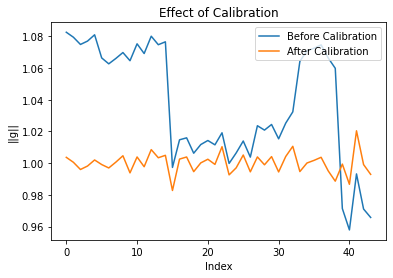

In [106]:
g_cal = np.sqrt(accel_cal[:,0]**2 + accel_cal[:,1]**2 + accel_cal[:,2]**2)
g_uncal = np.sqrt(accel_uncal[:,0]**2 + accel_uncal[:,1]**2 + accel_uncal[:,2]**2)
plt.plot(g_uncal, label='Before Calibration')
plt.plot(g_cal, label='After Calibration')
plt.xlabel('Index')
plt.ylabel('||g||')
plt.title('Effect of Calibration')
plt.legend(loc='upper right')
plt.show()